In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
from datetime import datetime, timedelta
import pytz
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/cleaned(v3)_dataset.csv')
df.head()

,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,start_point,end_point,hour,month,congestion_ratio,cluster,distance_ratio
0,Al Nadwah,10.482,21.500000,29.252093,1.033333,Yellow,2024-09-22 23:00:30.204384,"(24.8334879, 46.92008999999999)","(24.7888572, 46.8588979)",23,9,0.098582,0,2.051135
1,King Abdul Aziz Road,27.167,22.916667,71.128145,3.200000,Yellow,2024-09-22 23:00:30.604397,"(24.9286095, 46.7150481)","(24.796827, 46.5643251)",23,9,0.117790,0,0.843548
2,King Abdul Aziz Road,17.492,13.383333,78.419925,1.100000,Yellow,2024-09-22 23:00:30.690591,"(24.796827, 46.5643251)","(24.6575642, 46.5630617)",23,9,0.062886,0,0.765112
3,King Salman Road,23.308,19.883333,70.334283,4.700000,Orange,2024-09-22 23:00:30.960832,"(24.9229714, 46.7204701)","(24.796827, 46.5643251)",23,9,0.201648,0,0.853069
4,King Salman Road,5.568,6.633333,50.363819,0.266667,Blue,2024-09-22 23:00:31.053344,"(24.796827, 46.5643251)","(24.796728, 46.5538512)",23,9,0.047893,0,1.191331


In [ ]:
# prompt:  iwna t to drop cluster columns

df = df.drop(['cluster'], axis=1)


In [ ]:
# # Define the directory path where you want to save the file.
# directory = '/content/'  # For example, if you want to save in the '/content/' directory.

# # Save the DataFrame to the specified directory.
# df.to_csv(directory + 'cleaned(v3)_dataset.csv', index=False)

In [ ]:
df[df['distance_km'] >=  40]

,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,start_point,end_point,hour,month,congestion_ratio,distance_ratio


In [ ]:
df = df.loc[df['distance_km'] <= 40]

In [ ]:
import pandas as pd

# Perform groupby with two columns ('start_point', 'end_point') and aggregate the mean of the specified columns
aggregation_result = df.groupby(['road_name','start_point', 'end_point']).agg({
    'distance_km': 'mean',
    'duration_in_traffic_min': 'mean',
    'delay_min': 'mean',
    'congestion_ratio': 'mean'
}).reset_index()

# For 'traffic_condition', apply mode (most frequent value)
traffic_condition_mode = df.groupby(['start_point', 'end_point'])['traffic_condition'].agg(lambda x: x.mode()[0]).reset_index()

# Merge the mode of 'traffic_condition' back into the aggregation result
aggregation_result = pd.merge(aggregation_result, traffic_condition_mode, on=['start_point', 'end_point'])

ag_df = aggregation_result


In [ ]:
ag_df['traffic_condition'].value_counts()

,count
traffic_condition,
Blue,57
Yellow,32
Orange,22
Red,13
Dark Red,11


In [ ]:
ag_df[ag_df['traffic_condition'] == 'Dark Red']

,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition
18,Al Naqeel,"(24.7610771, 46.65565100000001)","(24.7357661, 46.5894917)",10.958857,21.500000,9.416667,0.887645,Dark Red
21,Al Shaba'Niah,"(24.7924503, 46.7216817)","(24.7658861, 46.7220544)",5.296000,10.977778,4.661111,0.880119,Dark Red
24,Al Thoumamah Rd,"(24.828963, 46.7249418)","(24.7478186, 46.64167339999999)",15.514625,30.208333,14.420833,0.968625,Dark Red
27,Dammam Road,"(24.7863886, 46.7072824)","(24.7879849, 46.7180645)",2.144000,5.314815,2.131481,0.994161,Dark Red
47,Olaya Road,"(24.7970264, 46.719939)","(24.7388275, 46.59441409999999)",16.740857,31.628571,15.995238,0.969704,Dark Red
51,Sabta,"(24.7648682, 46.6698285)","(24.7234426, 46.6544716)",7.493000,17.414286,5.609524,0.772595,Dark Red
62,التخصصي,"(24.7575596, 46.6895021)","(24.70444, 46.6237931)",12.061833,26.430556,13.177778,1.096832,Dark Red
64,الجبل الأبيض,"(24.7986638, 46.651131)","(24.7333613, 46.61165450000001)",13.337250,26.975000,9.508333,0.814044,Dark Red
104,شارع طريق الامام محمد بن سعود,"(24.7895261, 46.75266)","(24.7317617, 46.62908849999999)",14.987000,33.183333,18.066667,1.205489,Dark Red
121,طريق العروبة,"(24.7435352, 46.7525945)","(24.70444, 46.6237931)",15.865333,30.041667,12.455556,0.784162,Dark Red


In [ ]:
df.shape

(551, 13)

In [ ]:
df['hour'].value_counts().sort_index()

,count
hour,
0,76
1,48
2,43
3,23
4,16
5,4
6,5
7,2
8,2


In [ ]:
# # # Convert the 'timestamp' column to datetime
# # df['timestamp'] = pd.to_datetime(df['timestamp'])

# # # Extract the hour from the 'timestamp' column to identify the hour of congestion
# # df['hour'] = df['timestamp'].dt.hour
# # df['month'] = df['timestamp'].dt.month

# # Feature engineering: create a new column for congestion ratio
# # Calculate the congestion ratio as (delay_min / distance_km)
# # df['congestion_ratio'] = df['delay_min'] / df['distance_km']
# df['distance_ratio'] = df['duration_in_traffic_min'] / df['distance_km']
# # Select relevant columns: road_name, distance_km, delay_min, congestion_ratio, hour, and other details
# congestion_info = df[['road_name', 'distance_km', 'delay_min', 'congestion_ratio','distance_ratio', 'hour', 'traffic_condition', 'timestamp', 'start_point', 'end_point']]

# # Display the top 10 most congested roads based on the congestion ratio
# congestion_info.head(20)


In [ ]:
# import pandas as pd

# # Assuming the 'hour' column exists in your dataset and ranges from 0 to 23
# # Create a new column 'hour_group' to group hours into 4 groups (every 6 hours)
# df['hour_group'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['0-6', '6-12', '12-18', '18-24'], right=False)

# # Select only numeric columns for aggregation
# numeric_columns = df.select_dtypes(include='number').columns

# # Group by 'hour_group' and calculate the mean for each group (only numeric columns)
# grouped_by_hours = df.groupby('hour_group')[numeric_columns].mean().reset_index()

# # Display the result
# grouped_by_hours


In [ ]:
df

,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,start_point,end_point,hour,month,congestion_ratio,distance_ratio
0,Al Nadwah,10.482,21.500000,29.252093,1.033333,Yellow,2024-09-22 23:00:30.204384,"(24.8334879, 46.92008999999999)","(24.7888572, 46.8588979)",23,9,0.098582,2.051135
1,King Abdul Aziz Road,27.167,22.916667,71.128145,3.200000,Yellow,2024-09-22 23:00:30.604397,"(24.9286095, 46.7150481)","(24.796827, 46.5643251)",23,9,0.117790,0.843548
2,King Abdul Aziz Road,17.492,13.383333,78.419925,1.100000,Yellow,2024-09-22 23:00:30.690591,"(24.796827, 46.5643251)","(24.6575642, 46.5630617)",23,9,0.062886,0.765112
3,King Salman Road,23.308,19.883333,70.334283,4.700000,Orange,2024-09-22 23:00:30.960832,"(24.9229714, 46.7204701)","(24.796827, 46.5643251)",23,9,0.201648,0.853069
4,King Salman Road,5.568,6.633333,50.363819,0.266667,Blue,2024-09-22 23:00:31.053344,"(24.796827, 46.5643251)","(24.796728, 46.5538512)",23,9,0.047893,1.191331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,الأشقر,6.918,9.700000,42.791753,0.100000,Blue,2024-09-23 12:00:31.375722,"(24.9089055, 46.9546838)","(24.8775235, 46.9313462)",12,9,0.014455,1.402139
547,طريق العروبة,2.665,3.783333,42.264317,0.116667,Blue,2024-09-23 12:00:38.920929,"(24.70444, 46.6237931)","(24.6894848, 46.6294245)",12,9,0.043777,1.419637
548,الدائري الثاني,2.949,3.483333,50.796172,0.150000,Blue,2024-09-23 12:00:39.388019,"(24.662313, 46.8567589)","(24.6525801, 46.8461368)",12,9,0.050865,1.181191
549,Maan Bin Ows,5.405,7.483333,43.336303,0.450000,Yellow,2024-09-23 12:00:41.474116,"(24.6319775, 46.8013918)","(24.6365608, 46.8002853)",12,9,0.083256,1.384521


# clusters_1

In [ ]:
# Use both 'congestion_ratio' and 'distance_km' for clustering
features = df[['congestion_ratio']]

# Use MinMaxScaler to scale both 'congestion_ratio' and 'distance_km'
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

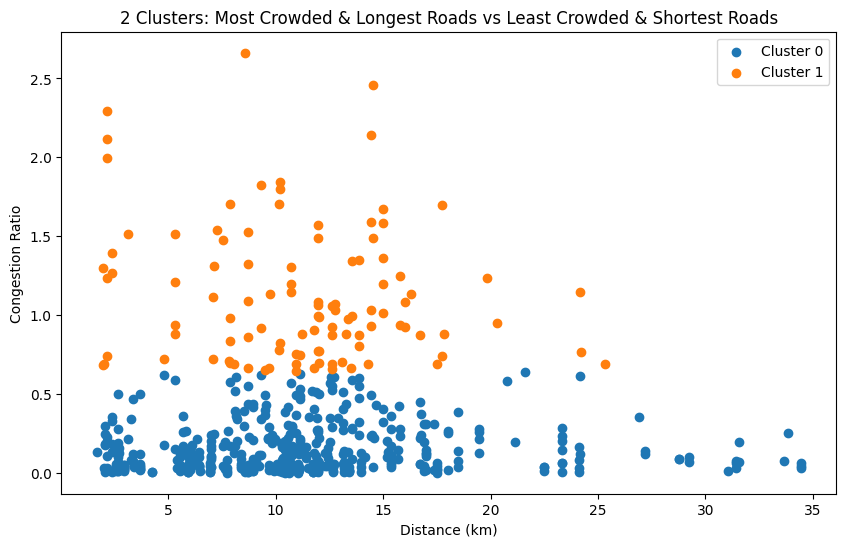

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['distance_km'], cluster_data['congestion_ratio'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Congestion Ratio')
plt.title('2 Clusters: Most Crowded & Longest Roads vs Least Crowded & Shortest Roads')
plt.legend()

# Show the plot
plt.show()

# clusters_2


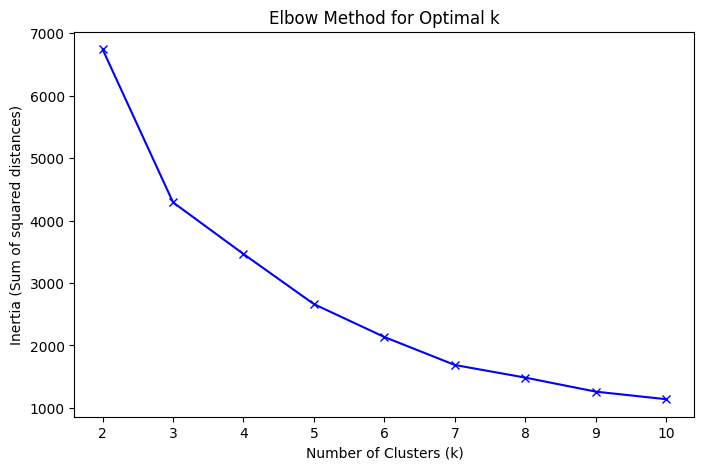

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the features for clustering from the aggregation_result (excluding non-numeric columns)
features = aggregation_result[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(2, 11)  # Test between 1 and 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the closest cluster center

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Prepare the features for clustering (select numeric columns)
features = ag_df[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Use MinMaxScaler to scale the features for fair clustering
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
ag_df['cluster'] = kmeans.fit_predict(features_scaled)

# Display the first few rows with cluster labels
ag_df[['road_name', 'start_point', 'end_point', 'cluster']]


,road_name,start_point,end_point,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",1
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",3
2,Airport Road,"(24.7686837, 46.6651902)","(24.7792215, 46.65118289999999)",3
3,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",3
4,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",1
...,...,...,...,...
130,ممر الجوابرة,"(24.7358603, 46.6683299)","(24.7033843, 46.6339255)",0
131,ممر قرطبة,"(24.8375078, 46.7583126)","(24.7921872, 46.7123915)",0
132,وادي الجناح,"(24.7058565, 46.6214901)","(24.7049319, 46.6187987)",3
133,وادي درعة,"(24.662828, 46.8265171)","(24.6354831, 46.7687661)",1


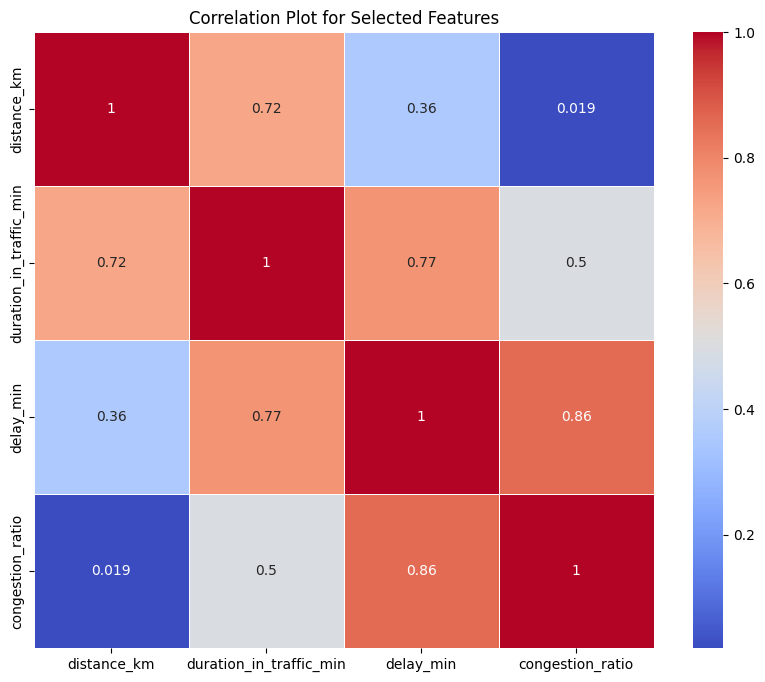

In [ ]:
# Create a correlation plot for the selected features
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = aggregation_result[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Selected Features')
plt.show()


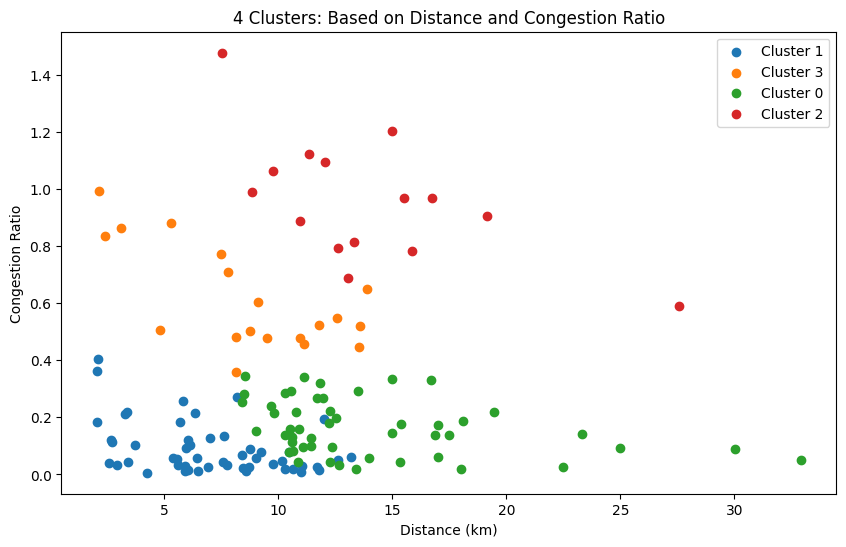

In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster in ag_df['cluster'].unique():
    cluster_data = ag_df[ag_df['cluster'] == cluster]
    plt.scatter(cluster_data['distance_km'], cluster_data['congestion_ratio'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Congestion Ratio')
plt.title('4 Clusters: Based on Distance and Congestion Ratio')
plt.legend()

# Show the plot
plt.show()


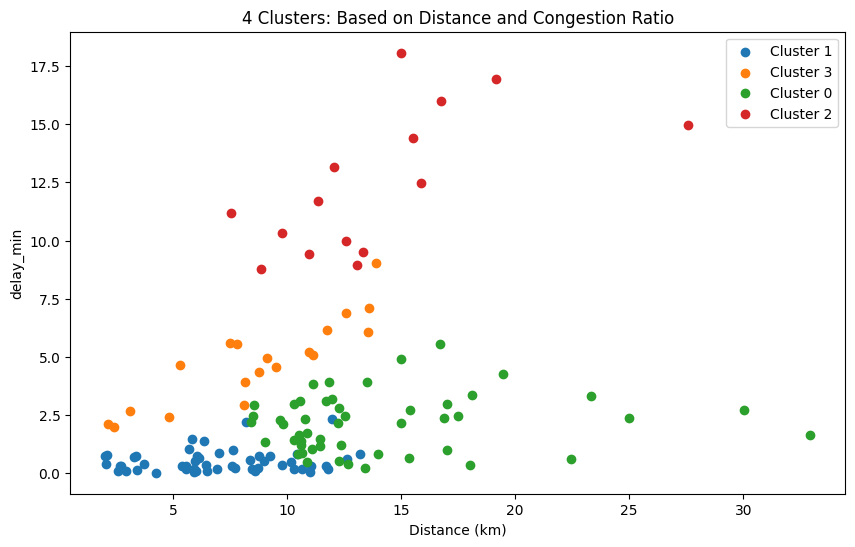

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster in ag_df['cluster'].unique():
    cluster_data = ag_df[ag_df['cluster'] == cluster]
    plt.scatter(cluster_data['distance_km'], cluster_data['delay_min'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('delay_min')
plt.title('4 Clusters: Based on Distance and Congestion Ratio')
plt.legend()

# Show the plot
plt.show()

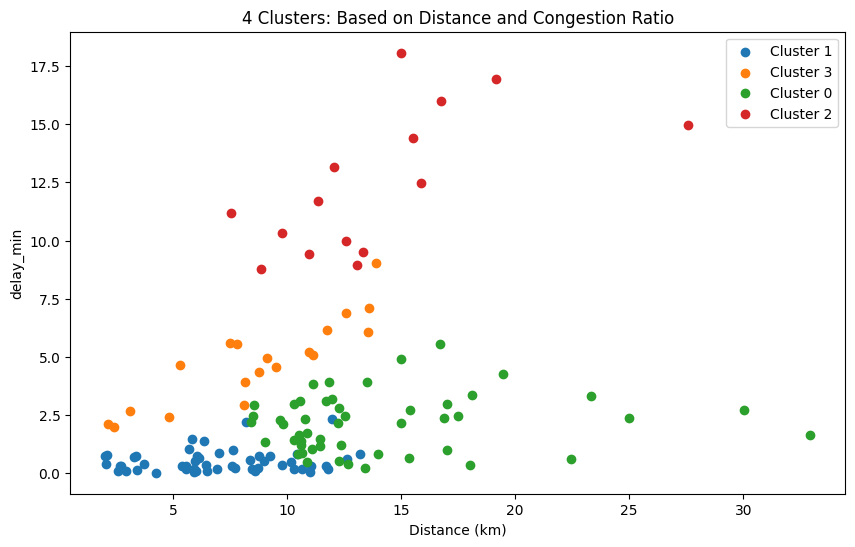

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster in ag_df['cluster'].unique():
    cluster_data = ag_df[ag_df['cluster'] == cluster]
    plt.scatter(cluster_data['distance_km'], cluster_data['delay_min'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('delay_min')
plt.title('4 Clusters: Based on Distance and Congestion Ratio')
plt.legend()

# Show the plot
plt.show()

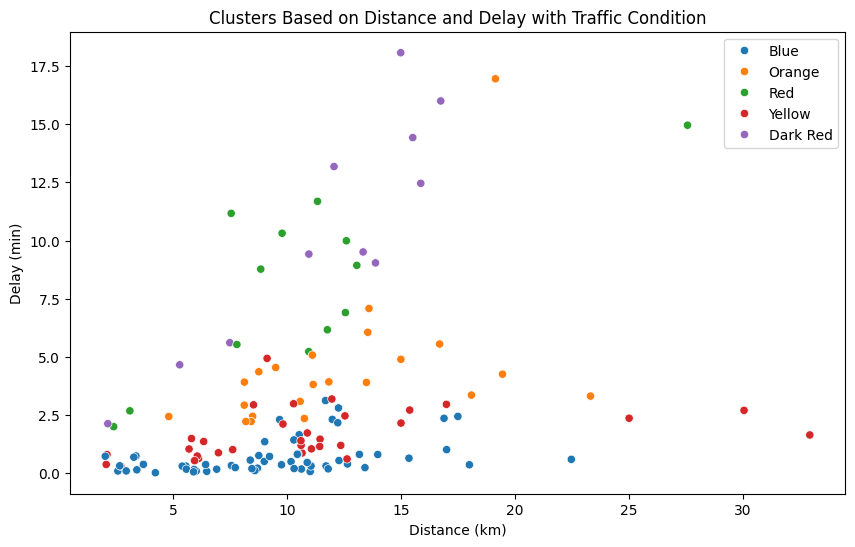

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # import seaborn

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
# Use seaborn scatterplot for hue functionality
sns.scatterplot(x=ag_df['distance_km'], y=ag_df['delay_min'], hue=ag_df['traffic_condition'])

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Delay (min)') # changed to delay min
plt.title('Clusters Based on Distance and Delay with Traffic Condition') # changed the title to be more descriptive
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_0 = ag_df[ag_df['cluster'] == 0]
pd.set_option('display.max_rows', None)
display(cluster_data_0)


,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
5,Al Abbas Al Rashidi St.,"(24.632121, 46.8075755)","(24.5901945, 46.7873646)",10.535000,14.600000,1.655556,0.157542,Blue,0
6,Al Falah,"(24.8092115, 46.7223044)","(24.7850233, 46.6956247)",10.660000,16.723333,0.873333,0.081926,Yellow,0
7,Al Ghareeb,"(24.7235126, 46.7900656)","(24.6781918, 46.7491328)",11.449333,17.283333,1.466667,0.126484,Yellow,0
8,Al Jabour,"(24.6443403, 46.7653899)","(24.6118611, 46.7158466)",8.531000,22.075000,2.941667,0.344743,Yellow,0
11,Al Khozama,"(24.7363697, 46.6231491)","(24.6855349, 46.575724)",12.280000,15.500000,0.550000,0.044788,Blue,0
14,Al Nadwah,"(24.8334879, 46.92008999999999)","(24.7888572, 46.8588979)",10.482000,21.300000,0.833333,0.079501,Blue,0
16,Al Nahdha road,"(24.7084279, 46.7865834)","(24.6365608, 46.8002853)",10.890000,14.450000,1.733333,0.159167,Yellow,0
25,Al Thoumamah Rd,"(24.9379168, 46.8154625)","(24.828963, 46.7249418)",16.885000,17.979167,2.362500,0.139917,Blue,0
26,Al Ward,"(24.6771063, 46.5904098)","(24.6359363, 46.5417608)",10.618000,16.600000,1.200000,0.113016,Yellow,0
32,FAHHAD MOHAMMAD AL JFIRAN STREET,"(24.688903, 46.7639947)","(24.6853532, 46.7123488)",8.494000,19.333333,2.450000,0.280315,Orange,0


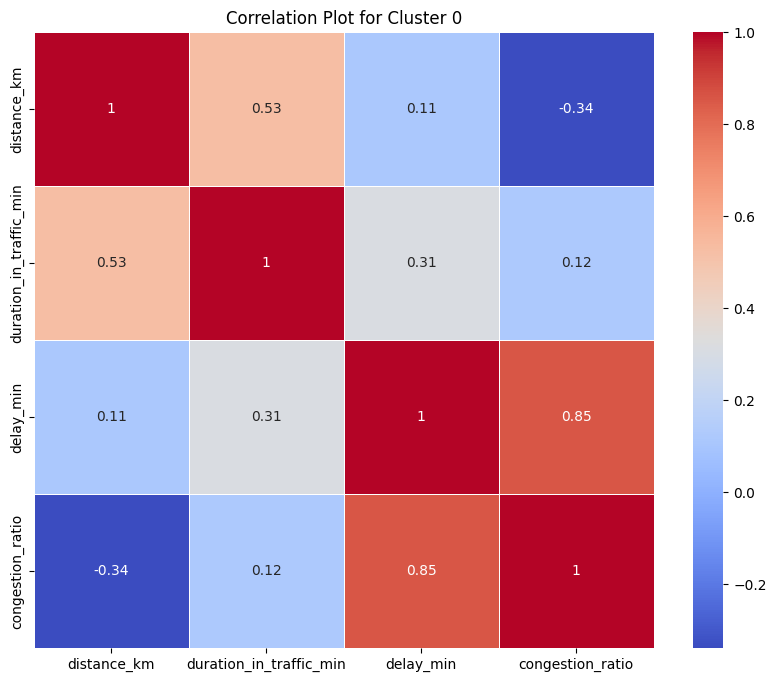

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for cluster 0
cluster_data_0 = aggregation_result[aggregation_result['cluster'] == 0]

# Select numeric features for correlation
features_cluster_0 = cluster_data_0[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 0
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_0 = features_cluster_0.corr()

sns.heatmap(correlation_matrix_cluster_0, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 0')
plt.show()


In [ ]:
features_cluster_0.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,50.000000,50.000000,50.000000,50.000000
mean,14.028456,18.563025,2.141831,0.164361
std,5.245840,3.375739,1.237493,0.096806
min,8.428000,13.091667,0.243333,0.018135
25%,10.628500,16.466667,1.165625,0.090693
50%,12.242000,18.421667,2.197917,0.147818
75%,16.363250,20.420833,2.957292,0.234628
max,32.923000,30.016667,5.553333,0.344743


In [ ]:
cluster_data_0.shape

(50, 9)

In [ ]:
cluster_data_0['traffic_condition'].value_counts()

,count
traffic_condition,
Blue,19
Yellow,19
Orange,12


In [ ]:
# cluster_data_0['delay_min'].value_counts()

In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_1= ag_df[ag_df['cluster'] == 1]
display(cluster_data_1)


,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",10.177333,13.588889,0.500000,0.048662,Blue,1
4,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",13.174000,11.495833,0.812500,0.061675,Blue,1
9,Al Janadriyah,"(24.8457928, 46.8565916)","(24.7890094, 46.8449595)",7.619000,8.550000,1.016667,0.133438,Yellow,1
10,Al Janadriyah,"(24.9446738, 46.99754)","(24.9458889, 47.00449709999999)",11.016000,8.225000,0.075000,0.006808,Blue,1
12,Al Muhareb,"(24.5853478, 46.7106843)","(24.5476694, 46.6484324)",8.708000,9.620000,0.220000,0.025264,Blue,1
19,Al Rafaih,"(24.6504677, 46.6764176)","(24.6265686, 46.6444919)",7.562000,13.883333,0.333333,0.044080,Blue,1
20,Al Remal,"(24.9626418, 46.85121820000001)","(24.8839823, 46.8066945)",11.712000,12.264815,0.314815,0.026880,Blue,1
23,Al Thoumamah Rd,"(24.7478186, 46.64167339999999)","(24.7457307, 46.6293496)",2.106500,5.038889,0.805556,0.406358,Yellow,1
29,East Ring Road,"(24.6280957, 46.7049403)","(24.6217419, 46.716629)",2.072000,5.763333,0.380000,0.183398,Yellow,1
36,Khurais Road,"(24.7173974, 46.7662467)","(24.7110979, 46.7619824)",2.585000,4.450000,0.100000,0.038685,Blue,1


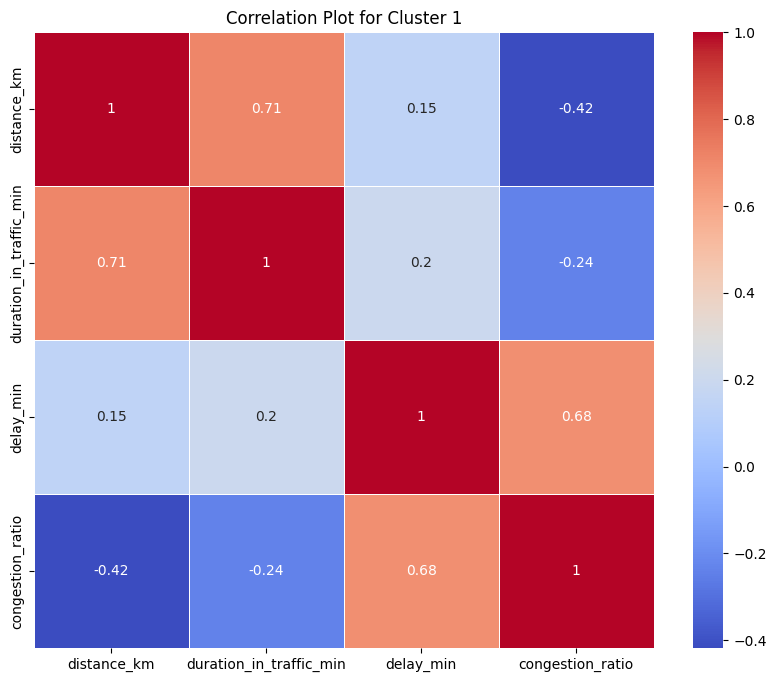

In [ ]:
# Filter data for cluster 1
cluster_data_1 = aggregation_result[aggregation_result['cluster'] == 1]

# Select numeric features for correlation in cluster 1
features_cluster_1 = cluster_data_1[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 1
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_1 = features_cluster_1.corr()

sns.heatmap(correlation_matrix_cluster_1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 1')
plt.show()


In [ ]:
features_cluster_1.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,51.000000,51.000000,51.000000,51.000000
mean,7.045635,9.443335,0.526494,0.091319
std,3.071342,3.469685,0.490014,0.091942
min,2.031000,3.435000,0.025000,0.005913
25%,5.486500,6.376389,0.187500,0.027507
50%,6.480000,9.683333,0.366667,0.056685
75%,9.118500,12.121991,0.737500,0.121608
max,13.174000,16.366667,2.316667,0.406358


In [ ]:
cluster_data_1.shape

(51, 9)

In [ ]:
cluster_data_1['traffic_condition'].value_counts()

,count
traffic_condition,
Blue,38
Yellow,12
Orange,1


In [ ]:
# cluster_data_1['delay_min'].value_counts()

In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_2 = ag_df[ag_df['cluster'] == 2]
display(cluster_data_2)


,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
18,Al Naqeel,"(24.7610771, 46.65565100000001)","(24.7357661, 46.5894917)",10.958857,21.500000,9.416667,0.887645,Dark Red,2
24,Al Thoumamah Rd,"(24.828963, 46.7249418)","(24.7478186, 46.64167339999999)",15.514625,30.208333,14.420833,0.968625,Dark Red,2
28,Discovery Blvd,"(24.7661004, 46.639909)","(24.7579988, 46.6366695)",8.849286,21.904762,8.771429,0.988753,Red,2
30,East Ring Road,"(24.7298106, 46.6686894)","(24.6280957, 46.7049403)",12.602500,23.119444,9.988889,0.792617,Red,2
31,East Ring Road,"(24.7921779, 46.8058943)","(24.7298106, 46.6686894)",19.137600,40.010000,16.946667,0.906699,Orange,2
41,King Abdullah Road,"(24.8027161, 46.8191147)","(24.70444, 46.6237931)",27.560500,41.772222,14.952778,0.591261,Red,2
47,Olaya Road,"(24.7970264, 46.719939)","(24.7388275, 46.59441409999999)",16.740857,31.628571,15.995238,0.969704,Dark Red,2
62,التخصصي,"(24.7575596, 46.6895021)","(24.70444, 46.6237931)",12.061833,26.430556,13.177778,1.096832,Dark Red,2
63,التنهاة,"(24.7573192, 46.5980154)","(24.7283066, 46.5971677)",7.553000,22.816667,11.166667,1.478441,Red,2
64,الجبل الأبيض,"(24.7986638, 46.651131)","(24.7333613, 46.61165450000001)",13.337250,26.975000,9.508333,0.814044,Dark Red,2


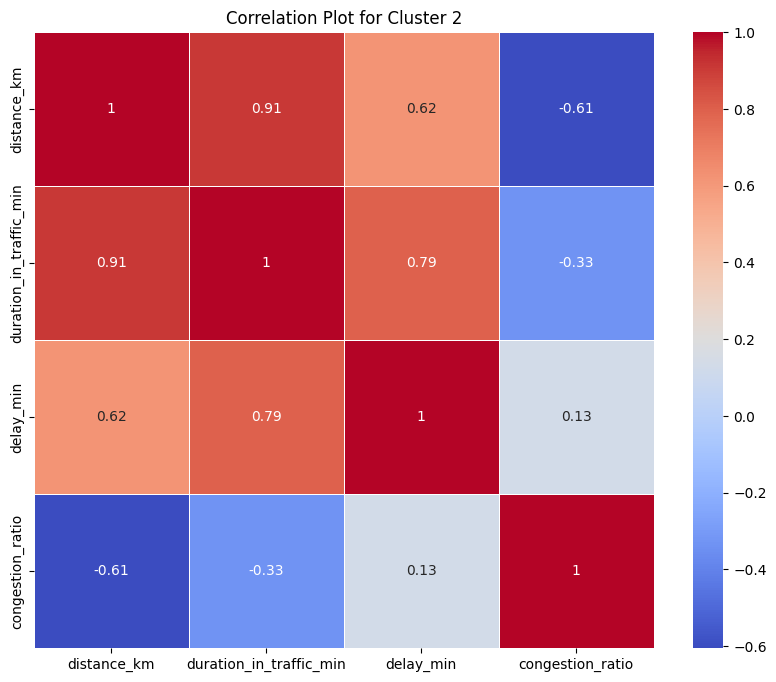

In [ ]:
# Filter data for cluster 2
cluster_data_2 = aggregation_result[aggregation_result['cluster'] == 2]

# Select numeric features for correlation in cluster 2
features_cluster_2 = cluster_data_2[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 2
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_2 = features_cluster_2.corr()

sns.heatmap(correlation_matrix_cluster_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 2')
plt.show()


In [ ]:
features_cluster_2.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,15.000000,15.000000,15.000000,15.000000
mean,13.956886,28.678537,12.386444,0.957424
std,4.882456,6.068446,3.065556,0.220982
min,7.553000,21.500000,8.771429,0.591261
25%,11.148329,24.511806,9.748611,0.803331
50%,13.061600,26.975000,11.683333,0.968625
75%,15.689979,30.918452,14.686806,1.079757
max,27.560500,41.772222,18.066667,1.478441


In [ ]:
cluster_data_2.shape

(15, 9)

In [ ]:
cluster_data_2['traffic_condition'].value_counts()

,count
traffic_condition,
Dark Red,7
Red,7
Orange,1


In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_3 = ag_df[ag_df['cluster'] == 3]
display(cluster_data_3)


,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",8.764750,21.504167,4.362500,0.503183,Orange,3
2,Airport Road,"(24.7686837, 46.6651902)","(24.7792215, 46.65118289999999)",2.400000,5.820833,2.004167,0.835282,Red,3
3,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",12.560800,19.910000,6.903333,0.547727,Red,3
13,Al Muhareb,"(24.6432381, 46.7284768)","(24.5853478, 46.7106843)",11.769000,21.550000,6.166667,0.523975,Red,3
15,Al Nahdha road,"(24.6365608, 46.8002853)","(24.6250042, 46.74273400000001)",8.132000,12.166667,3.916667,0.481636,Orange,3
17,Al Naqeel,"(24.7357661, 46.5894917)","(24.7245598, 46.5905193)",3.110000,8.583333,2.683333,0.862808,Red,3
21,Al Shaba'Niah,"(24.7924503, 46.7216817)","(24.7658861, 46.7220544)",5.296000,10.977778,4.661111,0.880119,Dark Red,3
22,Al Shaba'Niah,"(24.8519534, 46.8058949)","(24.7924503, 46.7216817)",13.593833,25.480556,7.080556,0.521875,Orange,3
27,Dammam Road,"(24.7863886, 46.7072824)","(24.7879849, 46.7180645)",2.144000,5.314815,2.131481,0.994161,Dark Red,3
33,Imam Malik Road,"(24.8387167, 46.6422775)","(24.7873741, 46.5671724)",10.954571,13.338095,5.228571,0.477265,Red,3


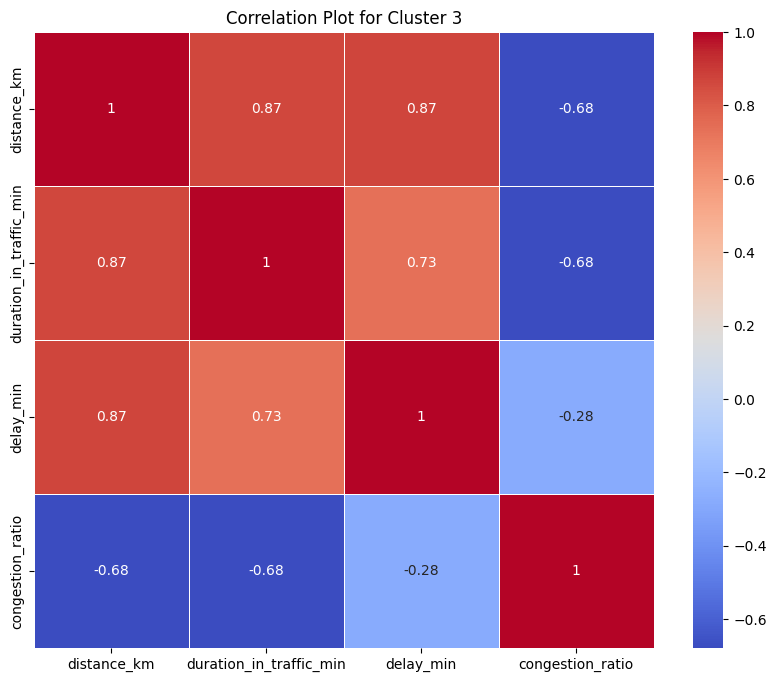

In [ ]:
# Filter data for cluster 3
cluster_data_3 = aggregation_result[aggregation_result['cluster'] == 3]

# Select numeric features for correlation in cluster 3
features_cluster_3 = cluster_data_3[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 3
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_3 = features_cluster_3.corr()

sns.heatmap(correlation_matrix_cluster_3, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 3')
plt.show()


In [ ]:
features_cluster_3.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,19.000000,19.000000,19.000000,19.000000
mean,8.638366,15.679007,4.805516,0.611228
std,3.754301,5.512456,1.856995,0.179219
min,2.144000,5.314815,2.004167,0.360298
25%,6.394500,12.219444,3.422222,0.479972
50%,8.764750,16.944444,4.937037,0.523975
75%,11.441000,19.534375,5.833095,0.740862
max,13.880000,25.480556,9.039583,0.994161


In [ ]:
cluster_data_3.shape

(19, 9)

In [ ]:
cluster_data_3['traffic_condition'].value_counts()

,count
traffic_condition,
Orange,8
Red,6
Dark Red,4
Yellow,1


In [ ]:
#######################################################################################################################

##clusters_3


In [ ]:
import pandas as pd

# Perform groupby with two columns ('start_point', 'end_point') and aggregate the mean of the specified columns
aggregation_result_3 = df.groupby(['road_name', 'start_point', 'end_point']).agg({
    'congestion_ratio': 'mean',
    'distance_ratio': 'mean'
}).reset_index()

# For 'traffic_condition', apply mode (most frequent value)
traffic_condition_mode = df.groupby(['start_point', 'end_point'])['traffic_condition'].agg(lambda x: x.mode()[0]).reset_index()

# Merge the mode of 'traffic_condition' back into the aggregation result
aggregation_result_3 = pd.merge(aggregation_result_3, traffic_condition_mode, on=['start_point', 'end_point'])

ag_df_3 = aggregation_result_3


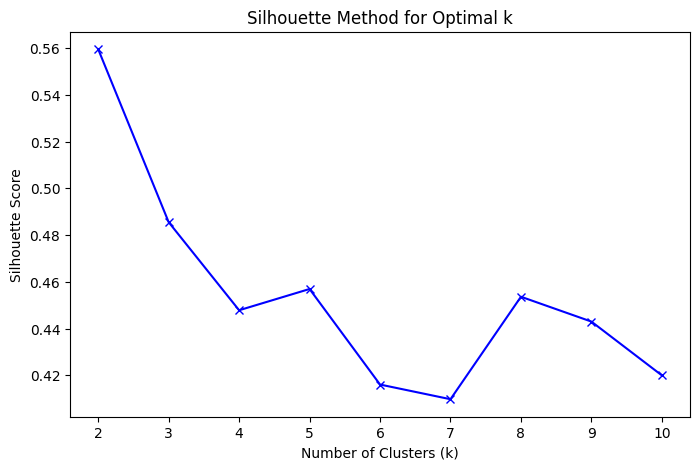

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare the features for clustering from the aggregation_result (using congestion_ratio and distance_ratio)
features = aggregation_result_3[['congestion_ratio', 'distance_ratio']]

# Use the Silhouette Method to find the optimal number of clusters
silhouette_scores = []
K = range(2, 11)  # Test between 2 and 10 clusters (Silhouette score is not defined for k=1)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Method results
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


In [ ]:
# aggregation_result_3

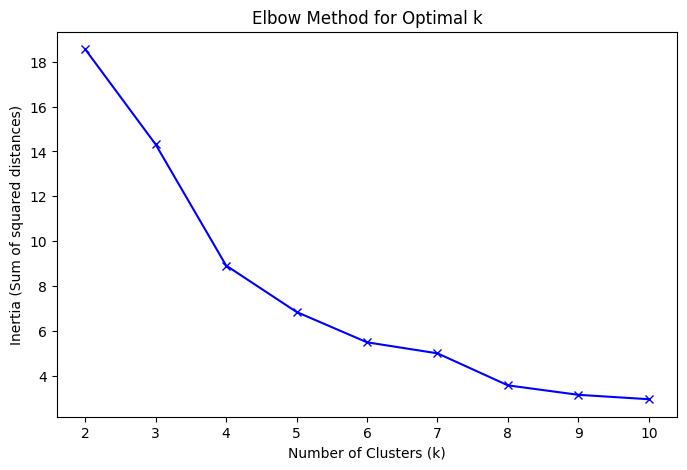

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the features for clustering from the aggregation_result (using congestion_ratio and distance_ratio)
features = aggregation_result_3[['congestion_ratio', 'distance_ratio']]

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(2, 11)  # Test between 1 and 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the closest cluster center

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Prepare the features for clustering (select the specified numeric columns)
features = ag_df_3[['congestion_ratio', 'distance_ratio']]

# Use MinMaxScaler to scale the features for fair clustering
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
ag_df_3['cluster'] = kmeans.fit_predict(features_scaled)

# Display the first few rows with cluster labels
ag_df_3[['road_name', 'start_point', 'end_point', 'cluster']]

,road_name,start_point,end_point,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",0
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",1
2,Airport Road,"(24.7686837, 46.6651902)","(24.7792215, 46.65118289999999)",1
3,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",0
4,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",0
5,Al Abbas Al Rashidi St.,"(24.632121, 46.8075755)","(24.5901945, 46.7873646)",0
6,Al Falah,"(24.8092115, 46.7223044)","(24.7850233, 46.6956247)",0
7,Al Ghareeb,"(24.7235126, 46.7900656)","(24.6781918, 46.7491328)",0
8,Al Jabour,"(24.6443403, 46.7653899)","(24.6118611, 46.7158466)",1
9,Al Janadriyah,"(24.8457928, 46.8565916)","(24.7890094, 46.8449595)",0


In [ ]:
import plotly.express as px

# Create a scatter plot with Plotly
fig = px.scatter(
    ag_df_3,
    x='distance_ratio',
    y='congestion_ratio',
    color='cluster',
    hover_data=['road_name', 'start_point', 'end_point'],
    title='Clusters Based on Congestion Ratio and Distance Ratio',
    color_discrete_sequence=['blue', 'Red']  # Specify two colors for the clusters
)

# Update labels for the axes, reduce figure size, and remove the color legend (bar)
fig.update_layout(
    xaxis_title='Distance Ratio',
    yaxis_title='Congestion Ratio',
    width=600,  # Set figure width
    height=400,  # Set figure height
    coloraxis_showscale=False  # Remove the color bar next to the plot
)

# Show the interactive plot
fig.show()


In [ ]:
cluster_data_3_0 = ag_df_3[ag_df_3['cluster'] == 0]
pd.set_option('display.max_rows', None)
display(cluster_data_3_0)


,road_name,start_point,end_point,congestion_ratio,distance_ratio,traffic_condition,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",0.048662,1.334965,Blue,0
3,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",0.547727,1.581369,Red,0
4,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",0.061675,0.872615,Blue,0
5,Al Abbas Al Rashidi St.,"(24.632121, 46.8075755)","(24.5901945, 46.7873646)",0.157542,1.387498,Blue,0
6,Al Falah,"(24.8092115, 46.7223044)","(24.7850233, 46.6956247)",0.081926,1.568793,Yellow,0
7,Al Ghareeb,"(24.7235126, 46.7900656)","(24.6781918, 46.7491328)",0.126484,1.515618,Yellow,0
9,Al Janadriyah,"(24.8457928, 46.8565916)","(24.7890094, 46.8449595)",0.133438,1.122195,Yellow,0
10,Al Janadriyah,"(24.9446738, 46.99754)","(24.9458889, 47.00449709999999)",0.006808,0.746641,Blue,0
11,Al Khozama,"(24.7363697, 46.6231491)","(24.6855349, 46.575724)",0.044788,1.262215,Blue,0
12,Al Muhareb,"(24.5853478, 46.7106843)","(24.5476694, 46.6484324)",0.025264,1.104731,Blue,0


In [ ]:
cluster_data_3_0.shape

(97, 7)

In [ ]:
# # Filter data for cluster 2
# cluster_data_3_0 = aggregation_result_3[aggregation_result_3['cluster'] == 0]

# # Select numeric features for correlation in cluster 2
# features_cluster_3_0 = cluster_data_3_0[['distance_ratio','congestion_ratio']]

# # Create a correlation plot for cluster 2
# plt.figure(figsize=(10, 8))
# correlation_matrix_cluster_3_0 = features_cluster_3_0.corr()

# sns.heatmap(correlation_matrix_cluster_3_0, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Plot for Cluster 2')
# plt.show()


In [ ]:
cluster_data_3_1 = ag_df_3[ag_df_3['cluster'] == 1]
pd.set_option('display.max_rows', None)
display(cluster_data_3_1)


,road_name,start_point,end_point,congestion_ratio,distance_ratio,traffic_condition,cluster
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",0.503183,2.461623,Orange,1
2,Airport Road,"(24.7686837, 46.6651902)","(24.7792215, 46.65118289999999)",0.835282,2.425508,Red,1
8,Al Jabour,"(24.6443403, 46.7653899)","(24.6118611, 46.7158466)",0.344743,2.587470,Yellow,1
13,Al Muhareb,"(24.6432381, 46.7284768)","(24.5853478, 46.7106843)",0.523975,1.831082,Red,1
17,Al Naqeel,"(24.7357661, 46.5894917)","(24.7245598, 46.5905193)",0.862808,2.759914,Red,1
18,Al Naqeel,"(24.7610771, 46.65565100000001)","(24.7357661, 46.5894917)",0.887645,1.994343,Dark Red,1
21,Al Shaba'Niah,"(24.7924503, 46.7216817)","(24.7658861, 46.7220544)",0.880119,2.072843,Dark Red,1
22,Al Shaba'Niah,"(24.8519534, 46.8058949)","(24.7924503, 46.7216817)",0.521875,1.867248,Orange,1
23,Al Thoumamah Rd,"(24.7478186, 46.64167339999999)","(24.7457307, 46.6293496)",0.406358,2.468123,Yellow,1
24,Al Thoumamah Rd,"(24.828963, 46.7249418)","(24.7478186, 46.64167339999999)",0.968625,1.985942,Dark Red,1


In [ ]:
cluster_data_3_1.shape

(38, 7)

In [ ]:
# # Filter data for cluster 2
# cluster_data_3_1 = aggregation_result_3[aggregation_result_3['cluster'] == 0]

# # Select numeric features for correlation in cluster 2
# features_cluster_3_1 = cluster_data_3_1[['distance_ratio','congestion_ratio']]

# # Create a correlation plot for cluster 2
# plt.figure(figsize=(10, 8))
# correlation_matrix_cluster_3_1 = features_cluster_3_1.corr()

# sns.heatmap(correlation_matrix_cluster_3_1, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Plot for Cluster 2')
# plt.show()

In [ ]:
# cluster_data_3_1.describe()

In [ ]:
# cluster_data_3_2 = ag_df_3[ag_df_3['cluster'] == 2]
# pd.set_option('display.max_rows', None)
# display(cluster_data_3_2)

In [ ]:
# cluster_data_3_2.shape

In [ ]:
# cluster_data_3_2.describe()

In [ ]:
# # Filter data for cluster 2
# cluster_data_3_2 = aggregation_result_3[aggregation_result_3['cluster'] == 0]

# # Select numeric features for correlation in cluster 2
# features_cluster_3_2 = cluster_data_3_2[['distance_ratio','congestion_ratio']]

# # Create a correlation plot for cluster 2
# plt.figure(figsize=(10, 8))
# correlation_matrix_cluster_3_2 = features_cluster_3_2.corr()

# sns.heatmap(correlation_matrix_cluster_3_2, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Plot for Cluster 2')
# plt.show()

In [ ]:
# cluster_data_3_3 = ag_df_3[ag_df_3['cluster'] == 3]
# pd.set_option('display.max_rows', None)
# display(cluster_data_3_3)

In [ ]:
# cluster_data_3_3.shape

In [ ]:
# cluster_data_3_3.describe()

In [ ]:
# # Filter data for cluster 2
# cluster_data_3_3 = aggregation_result_3[aggregation_result_3['cluster'] == 0]

# # Select numeric features for correlation in cluster 2
# features_cluster_3_3 = cluster_data_3_3[['distance_ratio','congestion_ratio']]

# # Create a correlation plot for cluster 2
# plt.figure(figsize=(10, 8))
# correlation_matrix_cluster_3_3 = features_cluster_3_3.corr()

# sns.heatmap(correlation_matrix_cluster_3_3, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Plot for Cluster 2')
# plt.show()

In [ ]:
#######################################################################################################################

In [ ]:
# # Filter data for clusters 2 and 3
# cluster_data_2_and_3 = aggregation_result[aggregation_result['cluster'].isin([2, 3])]

# # Group by road_name and calculate mean congestion_ratio, delay, and duration for ranking
# top_streets = cluster_data_2_and_3.groupby('road_name').agg({
#     'congestion_ratio': 'mean',
#     'delay_min': 'mean',
#     'duration_in_traffic_min': 'mean'
# }).reset_index()

# # Define a score that takes into account congestion_ratio, delay, and duration
# top_streets['traffic_score'] = (
#     top_streets['congestion_ratio'] * 0.5 +  # Weight for congestion
#     top_streets['delay_min'] * 0.3 +         # Weight for delay
#     top_streets['duration_in_traffic_min'] * 0.2  # Weight for duration
# )

# # Sort streets by the traffic score in descending order and select the top 10
# top_10_streets = top_streets.sort_values(by='traffic_score', ascending=False).head(10)

# # Display the top 10 streets
# top_10_streets


In [ ]:
##################################################################################

In [ ]:
# # Display each cluster with its rows to observe the differences between clusters
# cluster_data_4 = ag_df[ag_df['cluster'] == 4]
# display(cluster_data_4)

In [ ]:
# # Filter data for cluster 3
# cluster_data_4 = aggregation_result[aggregation_result['cluster'] == 4]

# # Select numeric features for correlation in cluster 4
# features_cluster_4 = cluster_data_4[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# # Create a correlation plot for cluster 4
# plt.figure(figsize=(10, 8))
# correlation_matrix_cluster_4 = features_cluster_4.corr()

# sns.heatmap(correlation_matrix_cluster_4, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Plot for Cluster 3')
# plt.show()

In [ ]:
# cluster_data_4.describe()

In [ ]:
# cluster_data_4.shape

In [ ]:
# # Analyze cluster relationships by summarizing statistics for each cluster
# cluster_summary = aggregation_result.groupby('cluster').agg({
#     'distance_km': ['mean', 'std', 'min', 'max'],
#     'duration_in_traffic_min': ['mean', 'std', 'min', 'max'],
#     'delay_min': ['mean', 'std', 'min', 'max'],
#     'congestion_ratio': ['mean', 'std', 'min', 'max'],
#     'traffic_condition': lambda x: x.mode()[0]
# }).reset_index()

# # Display the summary
# cluster_summary

In [ ]:
# # Re-attempt to extract only numeric columns from cluster_summary without dropping by name
# # Instead, select numeric types directly

# # Flatten the multi-level columns and extract only numeric columns
# cluster_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in cluster_summary.columns]
# cluster_summary_numeric = cluster_summary.select_dtypes(include=['float64', 'int64'])

# # Calculate the correlation matrix
# correlation_matrix = cluster_summary_numeric.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix for Cluster Summary')
# plt.show()


In [ ]:
# import folium
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import KMeans

# # Assuming 'start_point' and 'end_point' contain geographical coordinates as (latitude, longitude)
# # Split the 'start_point' and 'end_point' into latitude and longitude for the map

# ag_df[['start_lat', 'start_lon']] = ag_df['start_point'].str.strip('()').str.split(',', expand=True)
# ag_df[['end_lat', 'end_lon']] = ag_df['end_point'].str.strip('()').str.split(',', expand=True)

# # Convert the latitude and longitude columns to numeric
# ag_df['start_lat'] = pd.to_numeric(ag_df['start_lat'])
# ag_df['start_lon'] = pd.to_numeric(ag_df['start_lon'])
# ag_df['end_lat'] = pd.to_numeric(ag_df['end_lat'])
# ag_df['end_lon'] = pd.to_numeric(ag_df['end_lon'])

# # Prepare the features for clustering (select numeric columns)
# features = ag_df[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# # Use MinMaxScaler to scale the features for fair clustering
# scaler = MinMaxScaler()
# features_scaled = scaler.fit_transform(features)

# # Apply K-Means clustering with 4 clusters
# kmeans = KMeans(n_clusters=4, random_state=42)
# ag_df['cluster'] = kmeans.fit_predict(features_scaled)

# # Create a Folium map centered on the average latitude and longitude of the start points
# center_location = [ag_df['start_lat'].mean(), ag_df['start_lon'].mean()]
# traffic_map = folium.Map(location=center_location, zoom_start=12)

# # Add clustered points to the map
# for idx, row in ag_df.iterrows():
#     folium.CircleMarker(
#         location=(row['start_lat'], row['start_lon']),
#         radius=row['congestion_ratio'] * 5,  # Adjust marker size based on congestion ratio
#         color='red' if row['cluster'] == 0 else 'blue' if row['cluster'] == 1 else 'green' if row['cluster'] == 2 else 'purple',
#         fill=True,
#         fill_opacity=0.6
#     ).add_to(traffic_map)

# # Display the map
# traffic_map


In [ ]:
# # Filter the data to get only the roads in cluster 1 (most crowded)
# most_crowded_cluster = df[df['cluster'] == 1]

# # Sort the roads in cluster 1 by congestion_ratio in descending order
# most_crowded_cluster_sorted = most_crowded_cluster.sort_values(by='congestion_ratio', ascending=False)

# # Display the top 10 most crowded roads in cluster 1
# most_crowded_cluster_sorted


In [ ]:
# # Filter the data to get only the roads in cluster 1 (most crowded)
# most_crowded_cluster0 = df[df['cluster'] == 0]

# # Sort the roads in cluster 1 by congestion_ratio in descending order
# most_crowded_cluster_sorted = most_crowded_cluster0.sort_values(by='congestion_ratio', ascending=False)

# # Display the top 10 most crowded roads in cluster 1
# most_crowded_cluster_sorted

In [ ]:
# aggregation_result = df.groupby('road_name').agg({'congestion_ratio': 'mean'}).reset_index()
# aggregation_result

In [ ]:
# # Perform aggregation by taking the mean of congestion_ratio for each road_name
# aggregation_result = df.groupby('road_name').agg({'congestion_ratio': 'mean'}).reset_index()

# # Merge the aggregated congestion_ratio back into the original data
# df = df.merge(aggregation_result, on='road_name', suffixes=('', '_mean'))

# # Use MinMaxScaler to scale the congestion_ratio_mean (scaled version of the aggregated values)
# scaler = MinMaxScaler()
# df['congestion_ratio_scaled'] = scaler.fit_transform(df[['congestion_ratio_mean']])

# # Apply K-Means clustering on the scaled congestion ratio
# kmeans = KMeans(n_clusters=5, random_state=42)
# df['cluster'] = kmeans.fit_predict(df[['congestion_ratio_scaled']])

# # Display 10 examples from each cluster
# for cluster in df['cluster'].unique():
#     cluster_data = df[df['cluster'] == cluster].head(10)
#     print(f"\nCluster {cluster_data}:")
#     print("--------------------------")


In [ ]:
# # Plot the clusters
# plt.figure(figsize=(10, 6))

# # Plot each cluster with different colors
# for cluster in df['cluster'].unique():
#     cluster_data = df[df['cluster'] == cluster]
#     plt.scatter(cluster_data['distance_km'], cluster_data['congestion_ratio_mean'], label=f'Cluster {cluster}')

# # Add labels and title
# plt.xlabel('Distance (km)')
# plt.ylabel('Congestion Ratio (Mean)')
# plt.title('Clusters Based on Congestion Ratio')
# plt.legend()

# # Show the plot
# plt.show()